## Loading Functions

In [0]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pystan

## Task 1: Exponential likelihood with gamma prior

#### Loading Data

In [0]:
# Load the data set containing durations between calls arriving at the call center.
# All values are in minutes.

waiting_times_day = np.loadtxt('link to data source')

print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

# Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour

for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

Size of data set: 5856
First 3 values in data set: [30.   3.4  3.2]
Sum of data set: 1441.6838153800093


In [0]:
hour_index = 13 #data for 13th hour
waiting_times_hour = waiting_times_per_hour[hour_index]

#### Stan Code & Model

In [0]:
stan_code = """

data {
    int LENGTH;                       // number of elements in waiting_times_hour 
    real <lower = 0> prior_alpha;     // initial alpha
    real <lower = 0> prior_beta;      // initial beta
    real waiting_times_hour[LENGTH];  // vector of length LENGTH
}

parameters {
    real <lower = 0> lambda;  // the probability vector over categories
}

model {
    lambda ~ gamma(prior_alpha, prior_beta); // gamma prior

    for (i in 1:LENGTH){                    // exponential likelihood
        waiting_times_hour[i] ~ exponential(lambda);
    } 
}
"""

In [0]:
#compiling the model
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a954bd9dfd9c6db5077b1e3e1e512c41 NOW.


In [0]:
#inputs into model, values are provided in resources notebook
stan_data = {
    'LENGTH': len(waiting_times_hour),
    'prior_alpha': 1,
    'prior_beta': 0.25,
    'waiting_times_hour': waiting_times_hour
}

results = stan_model.sampling(data = stan_data)

#### 98% Confidence Interval

In [0]:
print(results.stansummary(pars = 'lambda', probs=[0.01, 0.99]))

Inference for Stan model: anon_model_a954bd9dfd9c6db5077b1e3e1e512c41.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd     1%    99%  n_eff   Rhat
lambda   6.35  8.8e-3   0.33   5.57   7.12   1429    1.0

Samples were drawn using NUTS at Sat Oct 19 20:19:54 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


#### Histogram of Posterior λ Samples

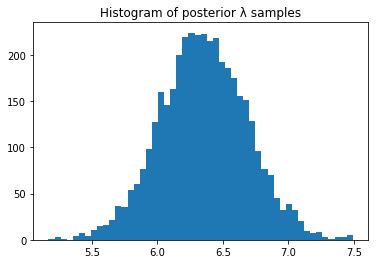

In [0]:
plt.hist(results.extract()['lambda'], bins = 50)
plt.title('Histogram of posterior λ samples')
plt.show()

## Task 2: Normal likelihood with normal-inverse-gamma prior

#### Loading Data

In [0]:
#data provided 
data2 = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])

#### Stan Code & Model

In [0]:
stan_code2 = """

data {
    real <lower = 0> alpha_0; // initially provided information
    real <lower = 0> beta_0;
    real mu_0; 
    real <lower = 0> nu_0;
    int LENGTH2; 
    real data2[LENGTH2]; 
}

parameters {
    real mu;                        // mu
    real <lower = 0> sigma_squared; // sigma_squared
}

model {
    sigma_squared ~ inv_gamma(alpha_0, beta_0);  // normal inverse gamma prior: mean is normally distributed
    mu ~ normal(mu_0, sqrt(sigma_squared/nu_0)); // variance has inverse gamma disribution

    for (i in 1:LENGTH2){                       // normal likelihood
        data2[i] ~ normal(mu, sqrt(sigma_squared));
    }  

}
"""

In [0]:
#compiling the model
stan_model2 = pystan.StanModel(model_code = stan_code2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a099c4cdf7d27e7429774984fb27653f NOW.


In [0]:
#inputs into model, values are provided in resources notebook
stan_data2 = {
    'alpha_0': 1.12,
    'beta_0': 0.4,
    'mu_0': 0,
    'nu_0': 0.054,
    'LENGTH2': len(data2),
    'data2': data2
}

results2 = stan_model2.sampling(data = stan_data2)

#### 95% Confidence Interval

In [0]:
print(results2.stansummary(pars = ['mu', 'sigma_squared'] , probs=[0.025, 0.975]))

Inference for Stan model: anon_model_a099c4cdf7d27e7429774984fb27653f.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
mu              3.07  2.3e-3   0.13    2.8   3.33   3363    1.0
sigma_squared   3.61  5.5e-3   0.36   2.97   4.38   4289    1.0

Samples were drawn using NUTS at Sat Oct 19 20:21:17 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


#### Visualizing Posteriors

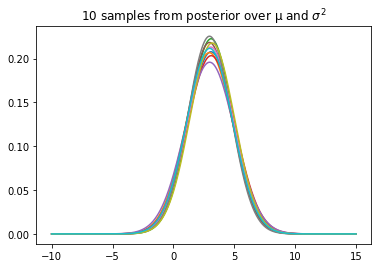

In [0]:
plot_x = np.linspace(-10, 15, 500)
samples = 10
for i in range(samples): 
    plot_y = sts.norm.pdf(plot_x, loc = results2.extract()['mu'][i], scale = np.sqrt(results2.extract()['sigma_squared'][i]))
    plt.plot(plot_x, plot_y)
plt.title('10 samples from posterior over μ and $σ^2$')
plt.show()

## Task 3: Log-normal HRTEM data

#### Loading Data

In [0]:
hrtemdata = np.loadtxt('link to data source')
loghrtemdata = np.log(hrtemdata) #taking the log of the data

In [0]:
stan_code3 = """

data {
    real <lower = 0> alpha_0;
    real <lower = 0> beta_0;
    real mu_0; 
    real <lower = 0> nu_0;
    int LENGTH3; 
    real loghrtemdata[LENGTH3]; 
}

parameters {
    real mu;  // mu
    real <lower = 0> sigma_squared; // sigma_squared
}

model {
    sigma_squared ~ inv_gamma(alpha_0, beta_0); // normal inverse gamma prior
    mu ~ normal(mu_0, sqrt(sigma_squared/nu_0));

    for (i in 1:LENGTH3){                    // likelihood = normal
        loghrtemdata[i] ~ normal(mu, sqrt(sigma_squared));
    }  

}
"""

In [0]:
#compiling the model
stan_model3 = pystan.StanModel(model_code = stan_code3)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2ad6585b834f8728e60b4389289b45cd NOW.


In [0]:
#inputs into model, values are provided in resources notebook
stan_data3 = {
    'alpha_0': 2,
    'beta_0': 5,
    'mu_0': 2.3,
    'nu_0': 0.1,
    'LENGTH3': len(loghrtemdata),
    'loghrtemdata': loghrtemdata
}

results3 = stan_model3.sampling(data = stan_data3)

#### 95% Confidence Interval

In [0]:
print(results3.stansummary(pars = ['mu', 'sigma_squared'] , probs=[0.025, 0.975]))

Inference for Stan model: anon_model_2ad6585b834f8728e60b4389289b45cd.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
mu              1.89  5.2e-4   0.03   1.83   1.96   3608    1.0
sigma_squared    0.5  5.2e-4   0.03   0.44   0.56   3612    1.0

Samples were drawn using NUTS at Sat Oct 19 20:22:38 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


#### Visualizing Posteriors

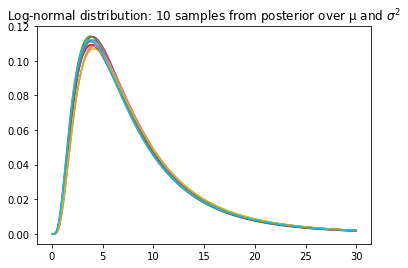

In [0]:
plot_x3 = np.linspace(0, 30, 1000)
samples3 = 10
for i in range(samples3): 
    plot_y3 = sts.lognorm.pdf(x = plot_x3, s = np.sqrt(results3.extract()['sigma_squared'][i]), scale = np.exp(results3.extract()['mu'][i]))
    plt.plot(plot_x3, plot_y3)
plt.title('Log-normal distribution: 10 samples from posterior over μ and $σ^2$')
plt.show()